### Table of content:
- Word vectors and Word Embeddings techniques:
 - TF-Idf
 - Word2vec
 - Glove (Case Study 2)
 - fasttext
- Conclusion
- References

# Word Vectors and Word Embedding Techniques

## TF-IDF Technique

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a commonly used technique in information retrieval and natural language processing to measure the importance of a word in a document or corpus of documents.

TF (Term Frequency) measures how often a term appears in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in that document.
***
$$TF = \frac{Term Frequency in a document}{ total number of terms in that document}$$
***
IDF (Inverse Document Frequency) measures the importance of a term in the corpus. It is calculated as the logarithm of the total number of documents in the corpus divided by the number of documents containing the term.

***
$$IDF(t) = log\frac{Number of documents}{ Number of documents contains the term} $$

***
The TF-IDF score for a term in a document is calculated as the product of its TF and IDF values. 
***
$$ TF-IDF = TF * IDF $$
***
The higher the TF-IDF score of a term, the more important it is to that document.

In [10]:
Document1= "سوف تمطر اليوم."
Document2= "أنا لن أخرج اليوم."
Document3= "أنا سوف أشاهد الدوري الممتاز."
Doc = [Document1 ,Document2 ,Document3]
print(Doc)

['سوف تمطر اليوم.', 'أنا لن أخرج اليوم.', 'أنا سوف أشاهد الدوري الممتاز.']


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [12]:
X = vectorizer.fit_transform(Doc)

In [13]:
#Vectorize process
analyze = vectorizer.build_analyzer()
print('Document 1',analyze(Document1))
print('Document 2',analyze(Document2))
print('Document 3',analyze(Document3))
print('Document transform',X.toarray())

Document 1 ['سوف', 'تمطر', 'اليوم']
Document 2 ['أنا', 'لن', 'أخرج', 'اليوم']
Document 3 ['أنا', 'سوف', 'أشاهد', 'الدوري', 'الممتاز']
Document transform [[0.         0.         0.         0.         0.         0.51785612
  0.68091856 0.51785612 0.        ]
 [0.5628291  0.         0.42804604 0.         0.         0.42804604
  0.         0.         0.5628291 ]
 [0.         0.49047908 0.37302199 0.49047908 0.49047908 0.
  0.         0.37302199 0.        ]]


In [14]:
print(vectorizer.get_feature_names())

['أخرج', 'أشاهد', 'أنا', 'الدوري', 'الممتاز', 'اليوم', 'تمطر', 'سوف', 'لن']


The output signifies the important words which add context to 3 sentences.

## Word2vec

Is a neural network-based technique used to create word embeddings, which are dense vector representations of words that capture their semantic and syntactic meanings. Word2Vec is trained on a large corpus of text data and is able to capture relationships between words based on their co-occurrence patterns.

Word2vec has two types, Continuous Bag-of-Words Model (CBOW) and Continuous Skip-gram Model.

- Continous Bag-of-words: Predicts the words according to the given context
- Continous Skip-gram: Predicts the context according to a given word

<img src="CBOW-and-Skip-gram-models-architecture-1.png" alt="Alt text that describes the graphic" title="CBOW and Skip-gram models architecture" />

### AraVec

the AraVec pre-trained model was trained on a large corpus of Arabic news articles and is freely available for download. The model provides 300-dimensional embeddings for over 13 million Arabic words and can be used for various NLP tasks such as sentiment analysis, named entity recognition, and machine translation.

you could download the models from here: https://github.com/bakrianoo/aravec/tree/master/AraVec%202.0

**Gensim** is an open-source Python library for natural language processing (NLP) that is designed to handle large-scale text data. It provides tools for creating and training models for a wide range of NLP tasks, including topic modeling, document similarity analysis, and word embedding generation.

In [19]:
#!pip install gensim

In [2]:
import gensim
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Salma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# load the model
model = gensim.models.Word2Vec.load('C:/Users/Salma/Downloads/NLP/tweet_cbow_100/tweets_cbow_100')

In [4]:
docs=[ 'كان يوم سعيد', 
'ماشاء الله عمل جيد', 
'ممتاز', 
 'عمل مكتمل', 
'اعتقد بانه ضعيف', 
'يوجد ثغرات ونقاط ضعف', 
'ليس جيدا', 
'كان عمل متعب']

In [5]:
#tokenize the sentences
tokens = []
for token in docs:
   tokens.append(word_tokenize(token))
tokens

[['كان', 'يوم', 'سعيد'],
 ['ماشاء', 'الله', 'عمل', 'جيد'],
 ['ممتاز'],
 ['عمل', 'مكتمل'],
 ['اعتقد', 'بانه', 'ضعيف'],
 ['يوجد', 'ثغرات', 'ونقاط', 'ضعف'],
 ['ليس', 'جيدا'],
 ['كان', 'عمل', 'متعب']]

In [6]:
print(model.wv['عمل'])

[ 2.4827127   1.1217401   1.9915663  -0.8115393  -1.2797518  -1.1393479
  0.6301894  -2.7466745  -0.8373155   0.765926   -0.6151101   0.10323401
 -3.1880581   2.5868382  -3.6575844   1.2840637   3.6955063  -0.42175478
 -0.89630777 -3.011231    0.5407107   1.3119694  -0.8601938  -3.53548
  1.0172825   2.8012316   5.307809    1.1731423   0.65753233  0.93005484
  0.34363973 -1.0161823  -1.5017736   0.43663538  0.777666   -4.3175907
 -4.165512    1.2192537   4.393431    0.8158059   1.931141   -0.5850694
  2.7965143  -0.7889261   4.190195   -2.6361992   1.1055651   0.32152632
 -0.5563024  -2.1357965   5.5327587   4.5402236  -0.03280575 -1.1678759
  0.8690506  -0.9485165  -0.8456044  -2.75508     3.0136886   4.1244087
 -1.9073681   1.8808751  -0.6813182   4.4711695  -0.8338863   1.4018703
  0.31786865 -0.94643587 -4.1383786   3.2047846  -1.7199676  -0.5941075
 -1.287734   -3.1760898  -1.5004879   1.406038    2.4072165  -5.229644
  0.03267641  0.16760705  2.5755303   1.8259935   1.6466143  -1

In [7]:
model.wv['عمل'].shape

(100,)

In [15]:
# find and print the most similar terms to a word
most_similar = model.wv.most_similar( "عمل", topn = 5 )
for term, score in most_similar:
	print(term, score)

يعمل 0.7017186284065247
وعمل 0.6235044002532959
عملها 0.5995053648948669
لعمل 0.5849803686141968
يعمله 0.5650099515914917


In [9]:
# Check the similiraty between two words
model.similarity(w1="انجاز", w2="نجاح")


C:\Users\Salma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.6119301

In [14]:
# Get the embeddings of a sentence
sentence_emb = np.mean([model['كان'], model['يوم'], model['سعيد']], axis= 0)
sentence_emb

C:\Users\Salma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 1.6219038 , -2.5811837 , -0.9162824 , -0.76971215,  0.08211048,
        0.68231744, -0.3953228 ,  1.5118284 , -1.5511898 , -3.512223  ,
        0.34733853,  0.7836403 , -0.9587457 , -0.10719929, -1.4275626 ,
       -1.1080433 ,  3.2308931 ,  1.3023505 , -1.4606568 , -0.43721715,
       -0.6570104 , -0.08484703,  1.1691722 , -1.7851963 , -1.5864822 ,
        0.353321  ,  0.19292407,  1.1091027 , -1.1502794 , -2.3459842 ,
       -0.35610142, -0.30827066, -2.1438138 , -0.7180459 , -1.059865  ,
       -0.31362095, -1.5409341 , -0.24858944, -2.542276  , -0.24805689,
        2.4734652 , -0.37441543,  0.34742442, -0.8223591 ,  1.7992667 ,
       -1.4735621 ,  0.05990716, -1.3224072 , -0.12828374, -0.02804526,
       -1.8332909 ,  1.4105735 ,  0.7690255 , -1.1706821 , -0.70510584,
        1.0214009 , -2.0262177 ,  0.7603232 , -0.13111232,  3.4543483 ,
        0.70478916,  3.8302689 , -0.42530766,  0.5218691 ,  2.144901  ,
        1.7408458 ,  0.7390205 ,  0.43435684, -1.5739156 ,  2.19

In [27]:
words = ['حلوي','طعام','واحد', 'قطه',  'حيوان', 'ثلاثه']
sample_vectors = np.array([model[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

C:\Users\Salma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[  5.179824 ,  -8.295018 ],
       [  9.500444 ,  -6.6381745],
       [-13.583485 ,  11.261883 ],
       [ -3.170061 ,  -5.0669136],
       [-12.170617 ,  -4.485379 ],
       [ 14.243902 ,  13.223603 ]], dtype=float32)

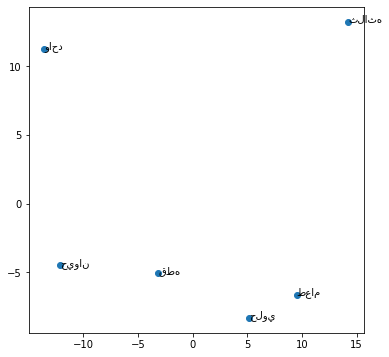

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

**Arabic Multidialectal Word Embeddings** are a set of pre-trained word embeddings learned from different dialects of Arabic. Individual dialects are mapped into each other's dialectal vector spaces to enable inter-dialectal comparison. provided by CAMEL lab resources. you could register for the access from here: https://camel.abudhabi.nyu.edu/arabic-multidialectal-embeddings/

## GloVe

It stands for Global Vectors. This is created by Stanford University, it is an extension to the word2vec method for efficiently learning word vectors. Glove has pre-defined dense vectors for around every 6 billion words of English literature along with many other general use characters like comma, braces, and semicolons. 

GloVe builds on the idea of matrix factorization techniques like LSA, which use the global statistics of co-occurrence counts of words in a corpus. In contrast, word2vec uses local context-based learning, where a window of words around each target word is used to predict its embedding.

Download the embedding files here: https://nlp.stanford.edu/projects/glove/

you could find the Glove Arabic words representation API here: https://github.com/tarekeldeeb/GloVe-Arabic 

note: check the Study Case 2

## Fasttext

fastText is another word embedding method that is an extension of the word2vec model. Instead of learning vectors for words directly, fastText represents each word as an n-gram of characters. The FastText model takes into account internal structure of words by splitting them into a bag of character n-grams and adding to them a whole word as a final feature.

This helps capture the meaning of shorter words and allows the embeddings to understand suffixes and prefixes. A skip-gram model is trained to learn the embeddings. This model is considered to be a bag of words model with a sliding window over a word. fastText works well with rare words. So even if a word wasn’t seen during training, it can be broken down into n-grams to get its embeddings.

you can download the fasttext models here: https://fasttext.cc/docs/en/crawl-vectors.html

fasttext pretrained arabic word vectors: https://www.kaggle.com/javadhelali/fasttext-pretrained-arabic-word-vectors

In [33]:
import pandas as pd
from gensim.models import FastText

In [34]:
# load dataset
df = pd.read_csv('C:/Users/Salma/Downloads/NLP/SentimentAnalysis_data/twitter_training.csv', header=None, usecols=[2,3])
df.columns = ['Sentiment', 'Text']
df = df.dropna()
# preview of dataset
df.head()

,Sentiment,Text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [35]:
sentences = [word_tokenize(s.lower()) for s in df.Text]

In [36]:
sentences

[['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all',
  ','],
 ['i',
  'am',
  'coming',
  'to',
  'the',
  'borders',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all',
  ','],
 ['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all',
  ','],
 ['im',
  'coming',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all',
  ','],
 ['im',
  'getting',
  'on',
  'borderlands',
  '2',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'me',
  'all',
  ','],
 ['im',
  'getting',
  'into',
  'borderlands',
  'and',
  'i',
  'can',
  'murder',
  'you',
  'all',
  ','],
 ['so',
  'i',
  'spent',
  'a',
  'few',
  'hours',
  'making',
  'something',
  'for',
  'fun',
  '.',
  '.',
  '.',
  'if',
  'you',
  'do',
  "n't",
  'know',
  'i',
  'am',
  'a',
  'huge',
  '@',
  'borderlands',
  'fan',
  'and',
  'maya',
  'is',
  'one',
  'of',
  'my',
  'favorite',
  'characters',
  '.',
 

In [39]:
#Train the model
fmodel = FastText(sentences, size=128, window=5, min_count=3, workers=4, sg=1, seed= 42 )

In [41]:
#save the model
fmodel.save('reviews.ft')

In [42]:
ftext = fmodel.wv

In [45]:
ftext.vector_size

128

In [48]:
ftext['food']

array([ 0.41143295, -0.00946181,  0.03282565, -0.48119286, -0.2830834 ,
        0.25036067,  0.29850256,  0.12144981, -0.3827998 , -0.37020457,
       -0.46926257,  0.37642795,  0.01999794,  0.17369555, -0.08891613,
        0.3732297 , -0.21313342,  0.07095917, -0.16328602, -0.08095618,
        0.0825174 ,  0.09648515, -0.08276588, -0.09918609,  0.4175607 ,
       -0.00532889,  0.2105701 ,  0.43655527,  0.03153528, -0.37027472,
       -0.20607263, -0.07355403, -0.00211199,  0.00865764,  0.06006128,
        0.15330237,  0.12265892,  0.07357588, -0.20596012, -0.11020932,
       -0.02827536, -0.10701413, -0.24455957, -0.12922357, -0.12780166,
       -0.13232455,  0.29436943,  0.26329947, -0.16893238, -0.04464223,
        0.06370749, -0.08506357,  0.3601444 , -0.23256809,  0.03129807,
       -0.4116578 ,  0.03018662,  0.03677583, -0.3203024 ,  0.01010258,
        0.12970532, -0.5125449 ,  0.54236346, -0.0219823 , -0.06332119,
       -0.08950543,  0.00310935, -0.23945098, -0.125768  ,  0.32

In [52]:
ftext.similar_by_word("borders", topn = 5)

[('borderands', 0.8763484954833984),
 ('orders', 0.8533129096031189),
 ('borderline', 0.8355847597122192),
 ('preorders', 0.8307496309280396),
 ('border', 0.8270134925842285)]

In [ ]:
#from gensim.models import KeyedVectors
#model_arabic = KeyedVectors.load_word2vec_format('/kaggle/input/fasttext-pretrained-arabic-word-vectors/cc.ar.300.vec')

All the upove Embedding techniques are built based on CBOW and skip-gram, in the NLP advancement process, there are other architectures like **BERT** and **GPT** which are built on transformers. There is also technique called **ELMo** which is based on LSTM

## Conclusion

In conclusion, word2vec, GloVe, and fastText are all popular algorithms for generating word embeddings, which are used to represent words as dense vectors in a high-dimensional space.

word2vec uses either continuous bag of words (CBOW) or skip-gram models to learn the embeddings from the context of the words in the text corpus.

GloVe, on the other hand, constructs an explicit word-context or word co-occurrence matrix using statistics across the whole text corpus, and then factorizes this matrix using matrix factorization techniques like SVD.

fastText extends the word2vec model by including subword information, which allows it to generate embeddings for rare words and out-of-vocabulary words.

Overall, each algorithm has its own strengths and weaknesses, and the choice of algorithm will depend on the specific application and the characteristics of the text corpus being used.

# Task 2

Apply Multiple word embedding techniques (atleast two) on the dataset you've choosed and preprocessed in task 1. and evaluate it using any machine learning classifier. then perform a comparison study on the results of each technique.

Deliverables: 

- your code in html format
- A report contains:
 - Dataset used.
 - the preprocessing technique used.
 - the word embedding techniques used.
 - the ML classifiers used.
 - a comparison table contains the results of each classifier - word Embedding.
 
<font color='red'>The deadline for submitting the task is 4/3/2023 </font>

### References
- https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3
- https://towardsdatascience.com/a-word2vec-implementation-using-numpy-and-python-d256cf0e5f28
- https://builtin.com/machine-learning/nlp-word2vec-python
- https://medium.com/@WaadTSS/how-to-use-arabic-word2vec-word-embedding-with-lstm-af93858b2ce
- https://stackabuse.com/implementing-word2vec-with-gensim-library-in-python/
- https://nlp.stanford.edu/pubs/glove.pdf
- https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010
- https://github.com/PradipNichite/Youtube-Tutorials/blob/main/Yotutube_WordVectors.ipynb
- https://github.com/codebasics/nlp-tutorials/blob/main/16_word_vectors_gensim_text_classification/gensim_w2v_google.ipynb
- https://www.geeksforgeeks.org/pre-trained-word-embedding-using-glove-in-nlp-models/
- https://medium.com/@93Kryptonian/word-embedding-using-fasttext-62beb0209db9
- https://github.com/codebasics/nlp-tutorials/blob/main/17_fasttext/fasttext_indian_food.ipynb
- https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html